# Lead_Scoring_Case_Study

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

### Importing Data Set

In [3]:
lead=pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### Handling Missing Values

In [8]:
# Replacing Select with Null values
lead=lead.replace('Select',np.nan)

In [9]:
# Checking for Null Values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Removing the columns with null values equal to or more than 40%
lead=lead.drop(columns=lead.loc[:,round((lead.isnull().sum()/lead.shape[0])*100,2)>=40])

In [11]:
lead.shape

(9240, 30)

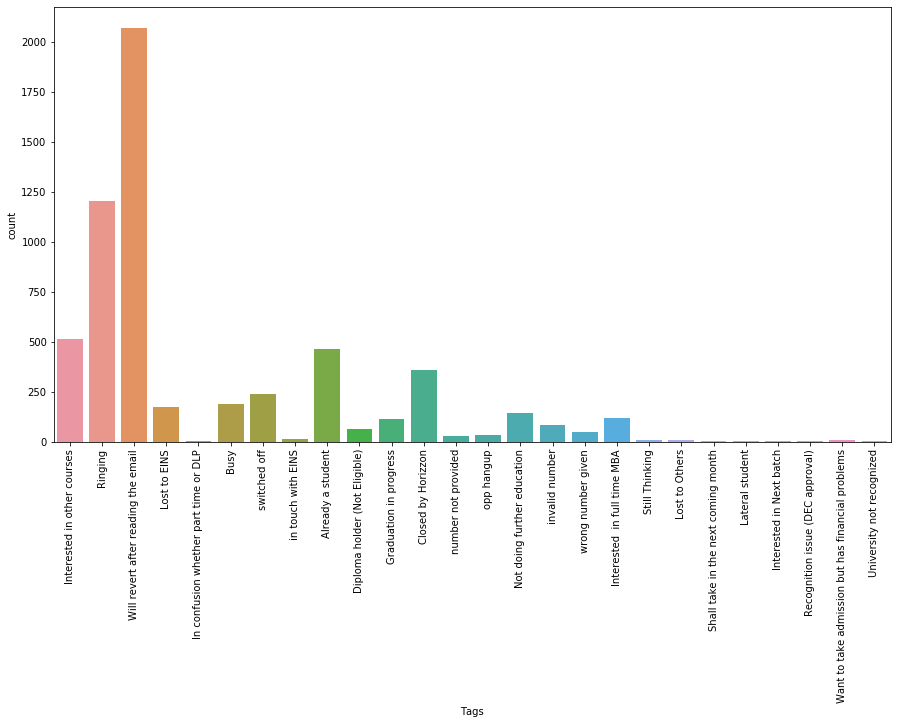

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(lead["Tags"])
plt.xticks(rotation=90)
plt.show()

In [13]:
lead["Tags"]=lead["Tags"].replace(np.nan,'Will revert after reading the email')

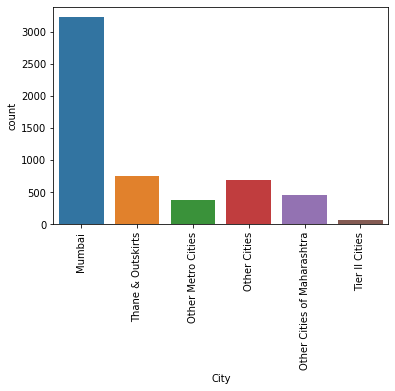

In [14]:
sns.countplot(lead["City"])
plt.xticks(rotation=90)
plt.show()

In [15]:
lead["City"].value_counts()/lead.shape[0]

Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

#### As the City column is highly skewed so it will be dropped

In [16]:
lead=lead.drop("City",axis=1)

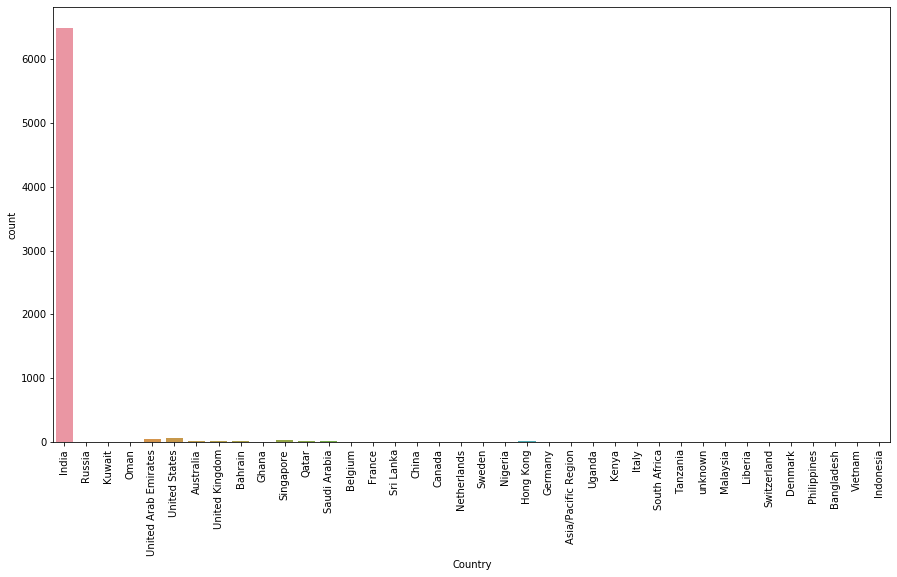

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(lead["Country"])
plt.xticks(rotation=90)
plt.show()

#### As the Country column is highly skewed so it will be dropped

In [18]:
lead=lead.drop("Country",axis=1)

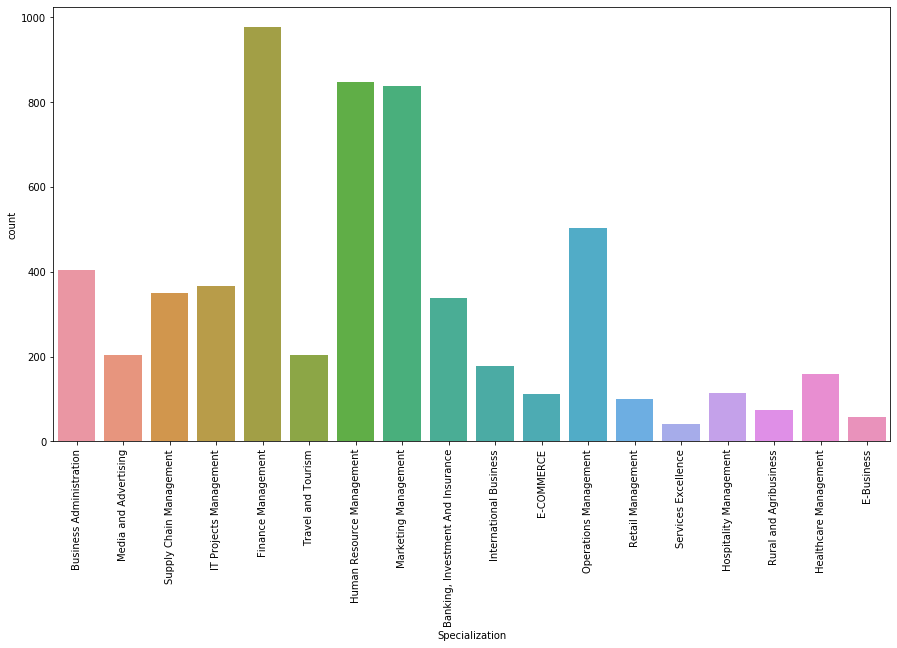

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(lead["Specialization"])
plt.xticks(rotation=90)
plt.show()

In [20]:
lead["Specialization"].value_counts()/lead.shape[0]

Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [21]:
# The Finance management, Human Resource Management and Marketing Management are almost have same percentage so it will be better to impute the missing values with some new category.
lead["Specialization"]=lead["Specialization"].replace(np.nan,'Others_Imputed')

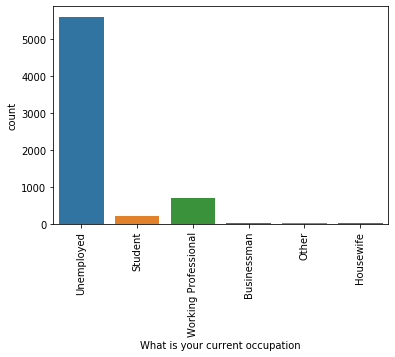

In [22]:
sns.countplot(lead["What is your current occupation"])
plt.xticks(rotation=90)
plt.show()

In [23]:
lead["What is your current occupation"].value_counts()/lead.shape[0]

Unemployed              0.606061
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

#### 'What is your current occupation' column is highly skewed so it will be dropped

In [24]:
lead=lead.drop("What is your current occupation", axis=1)

In [25]:
lead["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### 'What matters most to you in choosing a course' column is highly skewed so it will be dropped

In [26]:
lead=lead.drop("What matters most to you in choosing a course", axis=1)

#### Removing the remaining missing values

In [27]:
lead=lead.dropna(axis=0)

## Removing the unwanted Columns

#### Removing the columns added by the sales team

In [28]:
lead=lead.drop(["Last Activity","Tags","Last Notable Activity"],axis=1)

## Outlier Treatment

In [29]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


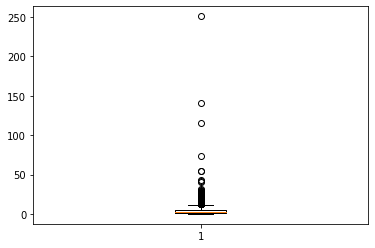

In [30]:
plt.boxplot(lead["TotalVisits"])
plt.show()

#### There are outliers in TotalVisits Column, so outliers will be removed

In [31]:
cond3=lead["TotalVisits"]>=lead["TotalVisits"].quantile(q=0.95)

In [32]:
lead=lead.drop(lead.loc[cond3].index)

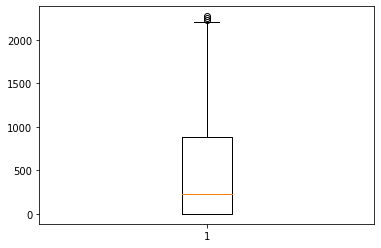

In [33]:
plt.boxplot(lead["Total Time Spent on Website"])
plt.show()

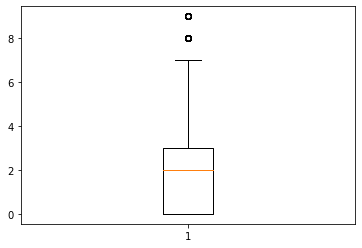

In [34]:
plt.boxplot(lead["Page Views Per Visit"])
plt.show()

#### Conversion Ratio

In [35]:
(lead["Converted"].value_counts()[1]/lead.shape[0])*100

37.33008016730568

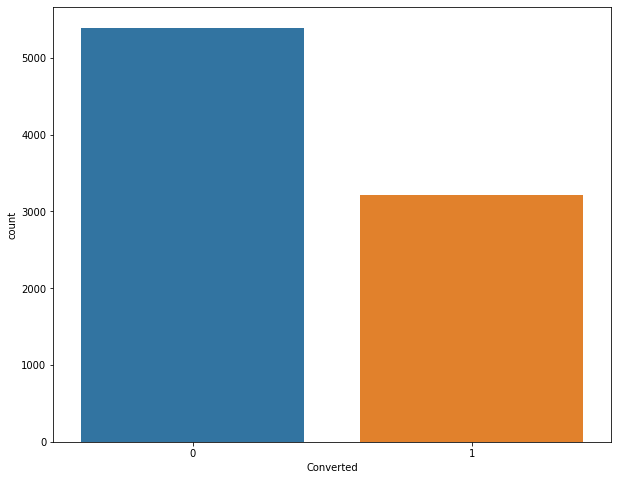

In [159]:
plt.figure(figsize=(10,8))
sns.countplot(lead["Converted"])
plt.show()

##  Analysis

In [36]:
lead["Lead Origin"].value_counts()/lead.shape[0]

Landing Page Submission    0.527826
API                        0.401650
Lead Add Form              0.067038
Lead Import                0.003486
Name: Lead Origin, dtype: float64

#### As the Lead Add form and Lead Import category are very small in propotion as compared to the other two. So they can be  grouped as others.  

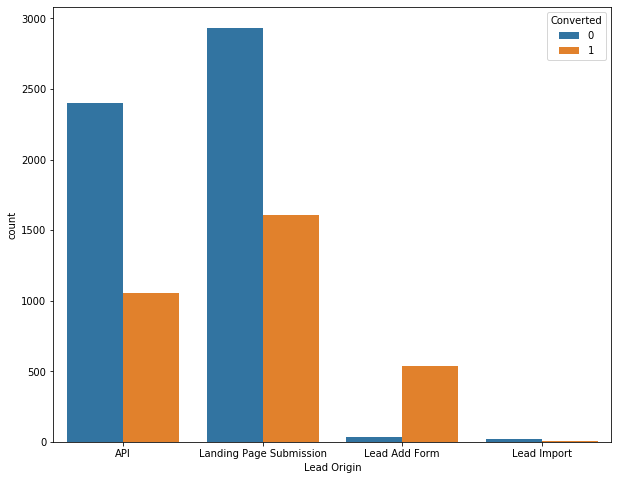

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(lead["Lead Origin"], hue=lead["Converted"])
plt.show()

#### Inference:
1. The leads identified using Landing Page Submission have high convertion rate as compared to leads identified using other sources. 
2. Leads identified from Lead Add Form are showing best response but the number is very less. 

In [39]:
lead["Lead Source"].value_counts()/lead.shape[0]

Google               0.318578
Direct Traffic       0.277797
Olark Chat           0.201812
Organic Search       0.116882
Reference            0.051237
Welingak Website     0.014872
Referral Sites       0.012199
Facebook             0.003602
bing                 0.000697
google               0.000581
Click2call           0.000349
Social Media         0.000232
Live Chat            0.000232
Pay per Click Ads    0.000116
NC_EDM               0.000116
welearnblog_Home     0.000116
testone              0.000116
WeLearn              0.000116
blog                 0.000116
Press_Release        0.000116
youtubechannel       0.000116
Name: Lead Source, dtype: float64

#### As the Lead Source column have number of categories which are very small in propotion as compared to the other once. So they can be  grouped as others. 

In [40]:
lead["Lead Source"]=lead["Lead Source"].replace(['Referral Sites', 'Reference', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],"Others")

In [41]:
# As the Lead Source column has Google and google two separate categories, so they have to be changed to single category.
lead["Lead Source"]=lead["Lead Source"].replace("google","Google")

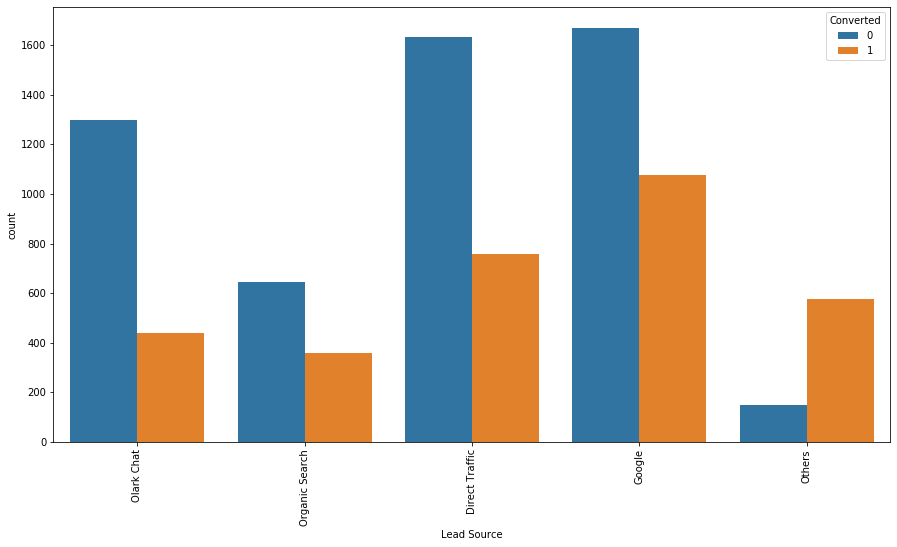

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(lead["Lead Source"], hue=lead["Converted"])
plt.xticks(rotation=90)
plt.show()

#### Inference:
1. The leads from Google have highest convertion rate. 
2. Leads from the Reference have very good but the number is very less. 

In [43]:
lead["Do Not Email"].value_counts()/lead.shape[0]

No     0.922156
Yes    0.077844
Name: Do Not Email, dtype: float64

In [44]:
lead["Do Not Call"].value_counts()/lead.shape[0]

No     0.999768
Yes    0.000232
Name: Do Not Call, dtype: float64

#### Do Not Email and Do Not Call Columns are highly skewed, So, they can removed

In [45]:
lead=lead.drop(["Do Not Email","Do Not Call"], axis=1)

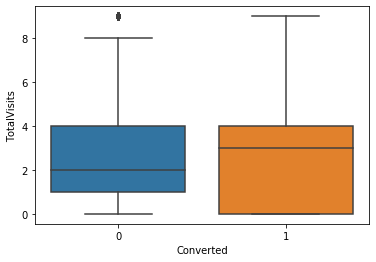

In [46]:
sns.boxplot(x="Converted",y="TotalVisits",data=lead)
plt.show()

#### People who have visited Website have higher median. 

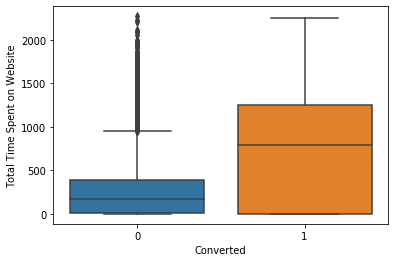

In [47]:
sns.boxplot(x="Converted",y="Total Time Spent on Website",data=lead)
plt.show()

#### People who have spent more time on website have higher coversion ratio

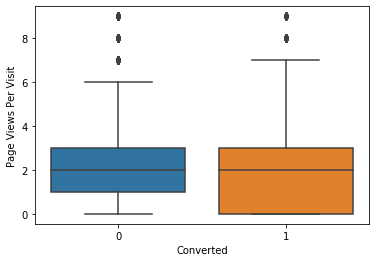

In [48]:
sns.boxplot(x="Converted",y="Page Views Per Visit",data=lead)
plt.show()

In [49]:
lead["Specialization"].value_counts()/lead.shape[0]

Others_Imputed                       0.372488
Finance Management                   0.105031
Marketing Management                 0.091553
Human Resource Management            0.090624
Operations Management                0.054839
Business Administration              0.043104
IT Projects Management               0.040432
Supply Chain Management              0.037179
Banking, Investment And Insurance    0.035901
Media and Advertising                0.021494
Travel and Tourism                   0.019984
International Business               0.019170
Healthcare Management                0.016150
E-COMMERCE                           0.011851
Hospitality Management               0.011851
Retail Management                    0.010573
Rural and Agribusiness               0.007436
E-Business                           0.006390
Services Excellence                  0.003950
Name: Specialization, dtype: float64

#### As the Specialization column have number of categories which are very small in propotion as compared to the other once. So they can be  grouped as others. 

In [50]:
lead["Specialization"]=lead["Specialization"].replace([ 'Business Administration',
       'Media and Advertising', 'Supply Chain Management',
       'IT Projects Management', 
       'Travel and Tourism', 
       'Banking, Investment And Insurance',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'Services Excellence',
       'Hospitality Management', 'Rural and Agribusiness',
       'Healthcare Management', 'E-Business'],"Others")

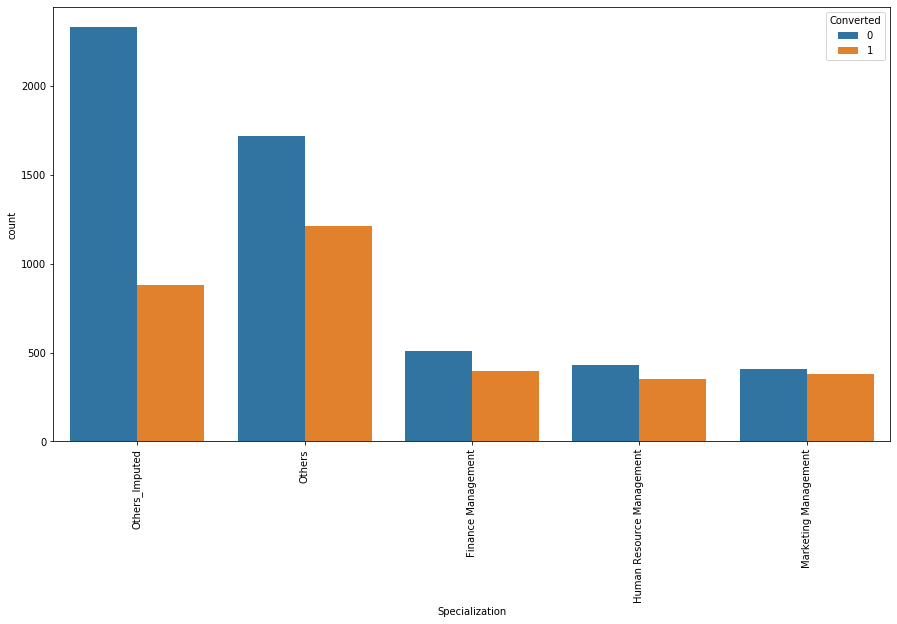

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(lead["Specialization"], hue=lead["Converted"])
plt.xticks(rotation=90)
plt.show()

In [52]:
lead["Search"].value_counts()/lead.shape[0]

No     0.999187
Yes    0.000813
Name: Search, dtype: float64

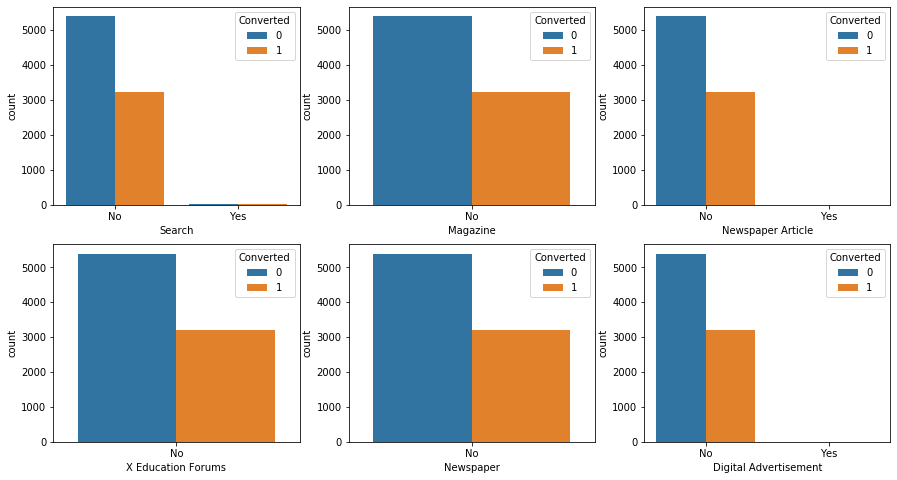

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(lead["Search"], hue=lead["Converted"])
plt.subplot(2,3,2)
sns.countplot(lead["Magazine"], hue=lead["Converted"])
plt.subplot(2,3,3)
sns.countplot(lead["Newspaper Article"], hue=lead["Converted"])
plt.subplot(2,3,4)
sns.countplot(lead["X Education Forums"], hue=lead["Converted"])
plt.subplot(2,3,5)
sns.countplot(lead["Newspaper"], hue=lead["Converted"])
plt.subplot(2,3,6)
sns.countplot(lead["Digital Advertisement"], hue=lead["Converted"])
plt.show()

#### 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement' columns are highly skwed. So they can be removed

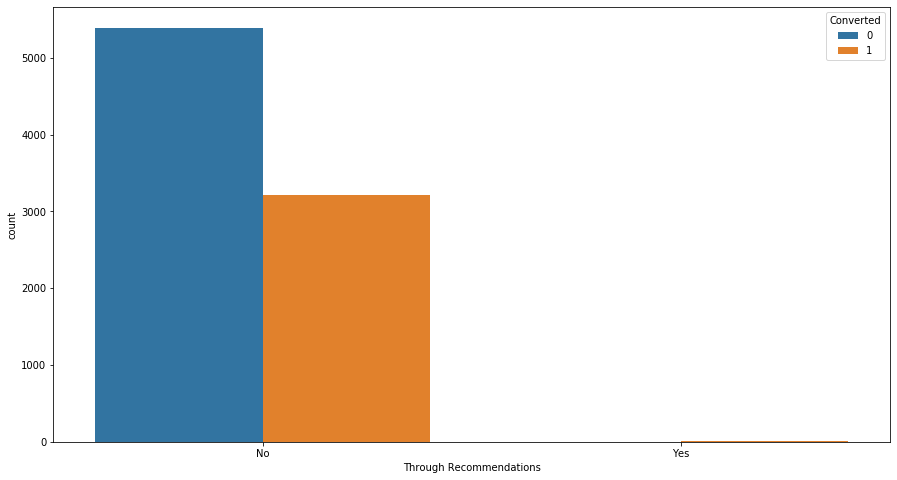

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(lead["Through Recommendations"], hue=lead["Converted"])
plt.show()

#### 'Through Recommendations' columns are highly skwed. So it will be removed

In [55]:
lead=lead.drop(['Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations'], axis=1)

In [56]:
lead["Receive More Updates About Our Courses"].value_counts()/lead.shape[0]

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

#### Receive More Updates About Our Courses column is also highly skewed, so it will be removed.

In [57]:
lead=lead.drop("Receive More Updates About Our Courses",axis=1)

In [58]:
lead["Update me on Supply Chain Content"].value_counts()/lead.shape[0]

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

#### Update me on Supply Chain Content is highly skwed, so it can be removed

In [59]:
lead=lead.drop("Update me on Supply Chain Content",axis=1)

In [60]:
lead["Get updates on DM Content"].value_counts()/lead.shape[0]

No    1.0
Name: Get updates on DM Content, dtype: float64

#### Get updates on DM Content is highly skwed, it will be removed

In [61]:
lead=lead.drop("Get updates on DM Content",axis=1)

In [62]:
lead["I agree to pay the amount through cheque"].value_counts()/lead.shape[0]

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

#### 'I agree to pay the amount through cheque' column is highly skwed, it will be removed

In [63]:
lead=lead.drop("I agree to pay the amount through cheque",axis=1)

In [64]:
lead["A free copy of Mastering The Interview"].value_counts()/lead.shape[0]

No     0.694086
Yes    0.305914
Name: A free copy of Mastering The Interview, dtype: float64

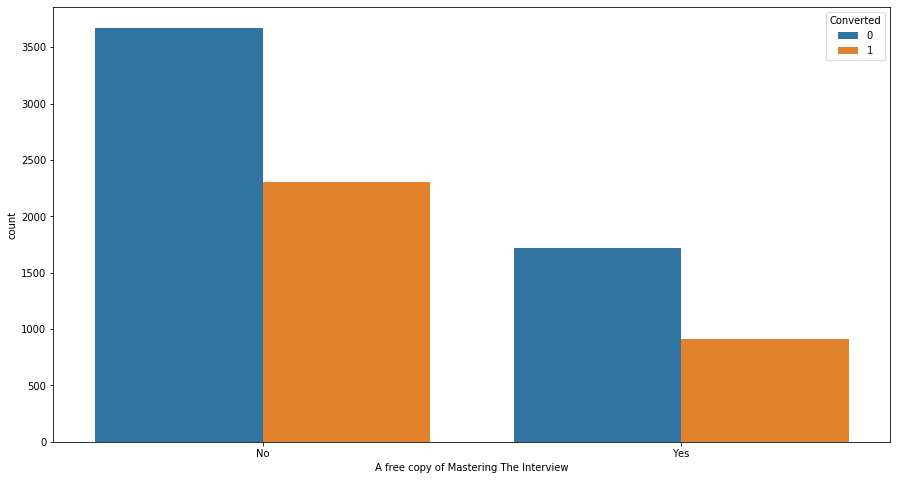

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(lead["A free copy of Mastering The Interview"], hue=lead["Converted"])
plt.show()

#### Lead Number column will not contribute to prediction part so it will be removed

In [66]:
lead=lead.drop("Lead Number",axis=1)

In [67]:
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'A free copy of Mastering The Interview'],
      dtype='object')

## Creating Dummy Variables

In [68]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8607 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8607 non-null   object 
 1   Lead Origin                             8607 non-null   object 
 2   Lead Source                             8607 non-null   object 
 3   Converted                               8607 non-null   int64  
 4   TotalVisits                             8607 non-null   float64
 5   Total Time Spent on Website             8607 non-null   int64  
 6   Page Views Per Visit                    8607 non-null   float64
 7   Specialization                          8607 non-null   object 
 8   A free copy of Mastering The Interview  8607 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 992.4+ KB


In [69]:
dummy1 = pd.get_dummies(lead['Lead Origin'], prefix='Lead_Origin', drop_first=True)
lead_1 = pd.concat([lead, dummy1], axis=1)

dummy2 = pd.get_dummies(lead['Lead Source'], prefix='Lead_Source' ,drop_first=True)
lead_1 = pd.concat([lead_1, dummy2], axis=1)

dummy3 = pd.get_dummies(lead['Specialization'], prefix='Specialization' ,drop_first=True)
lead_1 = pd.concat([lead_1, dummy3], axis=1)

dummy4 = pd.get_dummies(lead['A free copy of Mastering The Interview'],prefix="Interview_Catalog",drop_first=True)
lead_1 = pd.concat([lead_1, dummy4], axis=1)


# Dropping the repeated variables
lead_1=lead_1.drop(['Lead Origin', 'Lead Source', 'Specialization', 'A free copy of Mastering The Interview'],axis=1)

In [70]:
lead_1.shape

(8607, 17)

In [71]:
 lead_1.columns

Index(['Prospect ID', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Others',
       'Specialization_Others_Imputed', 'Interview_Catalog_Yes'],
      dtype='object')

## Test Train Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Putting feature variable to X
X = lead_1.drop(['Converted','Prospect ID'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,Specialization_Others_Imputed,Interview_Catalog_Yes
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,1,0


In [74]:
# Putting response variable to y
y = lead_1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#### Conversion ration for Train and Test Set

In [76]:
(y_train.value_counts()[1]/y_train.shape[0])*100

37.53086419753087

In [77]:
(y_test.value_counts()[1]/y_test.shape[0])*100

36.527293844367016

##  Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,Specialization_Others_Imputed,Interview_Catalog_Yes
2405,1.777464,0.089357,0.680422,1,0,0,1,0,0,0,0,0,1,0,0
2311,0.498648,0.762168,0.946576,1,0,0,1,0,0,0,0,0,1,0,0
3956,-1.206439,-0.869169,-1.182656,0,0,0,0,1,0,0,0,0,0,1,0
8958,0.498648,0.741892,-0.118040,1,0,0,0,0,0,0,1,0,0,0,1
233,1.351192,-0.620321,2.011192,1,0,0,0,0,1,0,0,0,1,0,1


## Correlations

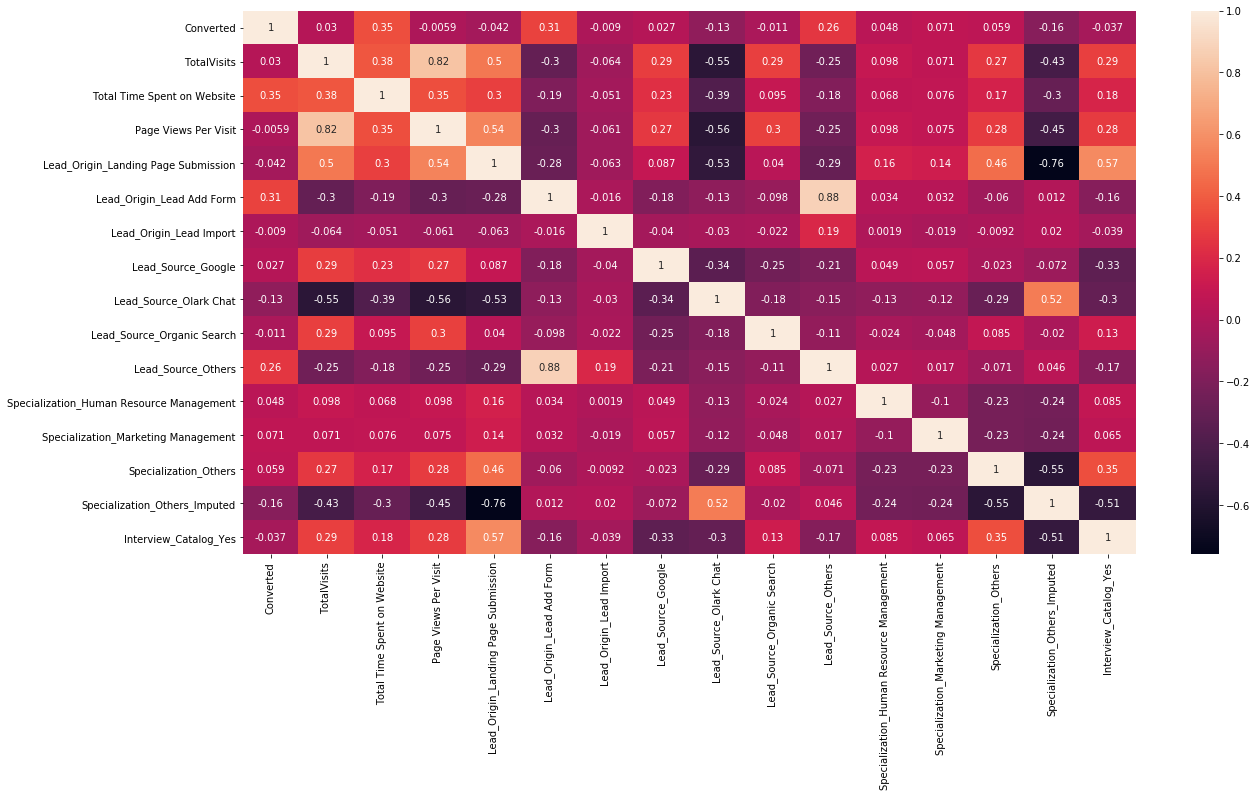

In [80]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_1.corr(),annot = True)
plt.show()

#### It cab be seen from the above correlation matrix that, there are certain parameters which are strongly correlated to others. So, they need to be taken care of while model building. 

## Model Building

In [81]:
import statsmodels.api as sm

In [82]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6885
Model:                            GLM   Df Residuals:                     6869
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3379.1
Date:                Mon, 17 May 2021   Deviance:                       6758.3
Time:                        15:19:35   Pearson chi2:                 7.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0290      0.169     -0.171      0.864      -0.360       0.302
TotalVisits                                  0.2241      0.053      4.240      0.000       0.121       0.328
Total Time Spent on Website                  1.1058      0.036     31.072      0.000       1.036       1.176
Page Views Per Visit                        -0.1160      0.053     -2.171      0.030      -0.221      -0.011
Lead_Origin_Landing Page Submission         -0.9420      0.121     -7.814      0.000      -1.178      -0.706
Lead_Origin_Lead Add Form                    4.8613      0.349     13.926      0.000       4.177       5.545
Lead_Origin_Lead Import                      1.0202      0.585      1.743      0.081      -0.127       2.167
Lead_Source_Google                           0.2027      0.102      1.993      0.046       0.003       0.402
Lead_Source_Olark Chat                       1.1968      0.142      8.449      0.000       0.919       1.474
Lead_Source_Organic Search                   0.1485      0.116      1.285      0.199      -0.078       0.375
Lead_Source_Others                          -0.1051      0.283     -0.371      0.710      -0.660       0.450
Specialization_Human Resource Management    -0.2308      0.136     -1.694      0.090      -0.498       0.036
Specialization_Marketing Management          0.0283      0.134      0.212      0.832      -0.234       0.290
Specialization_Others                       -0.0847      0.105     -0.804      0.421      -0.291       0.122
Specialization_Others_Imputed               -1.5160      0.142    -10.692      0.000      -1.794      -1.238
Interview_Catalog_Yes                       -0.1640      0.096     -1.703      0.089      -0.353       0.025
============================================================================================================
"""

#### There are certain features who have higher p-value. So, RFE method can be used for coarse feature selection

## Feature Selection Using RFE

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [84]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Others', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', False, 4),
 ('Specialization_Others', False, 3),
 ('Specialization_Others_Imputed', True, 1),
 ('Interview_Catalog_Yes', True, 1)]

In [86]:
col = X_train.columns[rfe.support_]

In [87]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Specialization_Marketing Management',
       'Specialization_Others'],
      dtype='object')

## Assessing the model with StatsModels

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6885
Model:                            GLM   Df Residuals:                     6872
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3382.3
Date:                Mon, 17 May 2021   Deviance:                       6764.5
Time:                        15:19:36   Pearson chi2:                 7.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0637      0.145     -0.439      0.661      -0.348       0.221
TotalVisits                                  0.1551      0.043      3.642      0.000       0.072       0.239
Total Time Spent on Website                  1.1049      0.036     31.071      0.000       1.035       1.175
Lead_Origin_Landing Page Submission         -0.9787      0.119     -8.204      0.000      -1.213      -0.745
Lead_Origin_Lead Add Form                    4.9257      0.348     14.151      0.000       4.244       5.608
Lead_Origin_Lead Import                      1.0775      0.584      1.844      0.065      -0.068       2.223
Lead_Source_Google                           0.1950      0.102      1.921      0.055      -0.004       0.394
Lead_Source_Olark Chat                       1.2314      0.141      8.755      0.000       0.956       1.507
Lead_Source_Organic Search                   0.1055      0.114      0.924      0.355      -0.118       0.329
Lead_Source_Others                          -0.1316      0.283     -0.465      0.642      -0.686       0.423
Specialization_Human Resource Management    -0.1793      0.108     -1.660      0.097      -0.391       0.032
Specialization_Others_Imputed               -1.4625      0.113    -12.983      0.000      -1.683      -1.242
Interview_Catalog_Yes                       -0.1577      0.096     -1.643      0.100      -0.346       0.030
============================================================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2405    0.383905
2311    0.518010
3956    0.191181
8958    0.381702
233     0.172142
998     0.117633
7423    0.711582
9046    0.733868
3672    0.206758
1891    0.191181
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38390546, 0.51800993, 0.19118128, 0.38170172, 0.17214217,
       0.11763299, 0.71158161, 0.73386803, 0.20675764, 0.19118128])

##### Creating a dataframe with the actual Converted column and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,1,0.383905,2405
1,1,0.518010,2311
2,0,0.191181,3956
3,0,0.381702,8958
4,0,0.172142,233


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,1,0.383905,2405,0
1,1,0.518010,2311,1
2,0,0.191181,3956,0
3,0,0.381702,8958,0
4,0,0.172142,233,0


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3730  571]
 [ 985 1599]]


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.774001452432825


#### Checking VIFs

In [96]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead_Source_Others,6.13
3,Lead_Origin_Lead Add Form,5.99
2,Lead_Origin_Landing Page Submission,3.66
10,Specialization_Others_Imputed,2.82
11,Interview_Catalog_Yes,2.63
6,Lead_Source_Olark Chat,2.47
5,Lead_Source_Google,2.27
0,TotalVisits,2.10
7,Lead_Source_Organic Search,1.43
1,Total Time Spent on Website,1.29


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
print("Sensitivity is ", TP / float(TP+FN))
print("Specificity is ", TN / float(TN+FP))
print("False postive rate is ", FP/ float(TN+FP))
print("Positive predictive value ", TP / float(TP+FP))
print("Negative predictive value ", TN / float(TN+ FN))

Sensitivity is  0.6188080495356038
Specificity is  0.8672401767030923
False postive rate is  0.1327598232969077
Positive predictive value  0.7368663594470046
Negative predictive value  0.7910922587486744


### On the basis of P-Value "Lead_Source_Others" Column has to removed

In [100]:
# Let's drop Specialization_Marketing Management since it has a high p-value
col = col.drop('Lead_Source_Others')
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Specialization_Human Resource Management',
       'Specialization_Others_Imputed', 'Interview_Catalog_Yes'],
      dtype='object')

In [101]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6885
Model:                            GLM   Df Residuals:                     6873
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3382.4
Date:                Mon, 17 May 2021   Deviance:                       6764.7
Time:                        15:19:36   Pearson chi2:                 7.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0795      0.141     -0.564      0.573      -0.356       0.197
TotalVisits                                  0.1530      0.042      3.613      0.000       0.070       0.236
Total Time Spent on Website                  1.1053      0.036     31.084      0.000       1.036       1.175
Lead_Origin_Landing Page Submission         -0.9721      0.118     -8.208      0.000      -1.204      -0.740
Lead_Origin_Lead Add Form                    4.8087      0.239     20.089      0.000       4.339       5.278
Lead_Origin_Lead Import                      0.9599      0.526      1.824      0.068      -0.072       1.992
Lead_Source_Google                           0.2074      0.098      2.115      0.034       0.015       0.399
Lead_Source_Olark Chat                       1.2459      0.137      9.080      0.000       0.977       1.515
Lead_Source_Organic Search                   0.1165      0.112      1.043      0.297      -0.102       0.335
Specialization_Human Resource Management    -0.1798      0.108     -1.665      0.096      -0.391       0.032
Specialization_Others_Imputed               -1.4635      0.113    -12.994      0.000      -1.684      -1.243
Interview_Catalog_Yes                       -0.1519      0.095     -1.595      0.111      -0.338       0.035
============================================================================================================
"""

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3730  571]
 [ 985 1599]]


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.774001452432825


In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_Landing Page Submission,3.63
9,Specialization_Others_Imputed,2.65
10,Interview_Catalog_Yes,2.63
6,Lead_Source_Olark Chat,2.43
5,Lead_Source_Google,2.21
0,TotalVisits,2.07
7,Lead_Source_Organic Search,1.41
1,Total Time Spent on Website,1.29
3,Lead_Origin_Lead Add Form,1.26
8,Specialization_Human Resource Management,1.16


In [105]:
# Let's drop Lead_Source_Organic Search	 since it has a high p-value
col = col.drop('Lead_Source_Organic Search')
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Specialization_Human Resource Management',
       'Specialization_Others_Imputed', 'Interview_Catalog_Yes'],
      dtype='object')

In [106]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6885
Model:                            GLM   Df Residuals:                     6874
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3382.9
Date:                Mon, 17 May 2021   Deviance:                       6765.8
Time:                        15:19:36   Pearson chi2:                 7.07e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0242      0.131     -0.185      0.853      -0.280       0.232
TotalVisits                                  0.1651      0.041      4.055      0.000       0.085       0.245
Total Time Spent on Website                  1.1051      0.036     31.080      0.000       1.035       1.175
Lead_Origin_Landing Page Submission         -0.9917      0.117     -8.481      0.000      -1.221      -0.763
Lead_Origin_Lead Add Form                    4.7661      0.236     20.215      0.000       4.304       5.228
Lead_Origin_Lead Import                      0.9181      0.525      1.750      0.080      -0.110       1.946
Lead_Source_Google                           0.1596      0.087      1.844      0.065      -0.010       0.329
Lead_Source_Olark Chat                       1.2023      0.131      9.211      0.000       0.946       1.458
Specialization_Human Resource Management    -0.1810      0.108     -1.677      0.094      -0.393       0.031
Specialization_Others_Imputed               -1.4612      0.113    -12.980      0.000      -1.682      -1.241
Interview_Catalog_Yes                       -0.1678      0.094     -1.786      0.074      -0.352       0.016
============================================================================================================
"""

In [107]:
# Let's drop Specialization_Human Resource Management since it has a high p-value
col = col.drop('Specialization_Human Resource Management')
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Specialization_Others_Imputed',
       'Interview_Catalog_Yes'],
      dtype='object')

In [108]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6885
Model:                            GLM   Df Residuals:                     6875
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3384.3
Date:                Mon, 17 May 2021   Deviance:                       6768.6
Time:                        15:19:36   Pearson chi2:                 7.07e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.0475      0.130     -0.366      0.715      -0.302       0.207
TotalVisits                             0.1647      0.041      4.049      0.000       0.085       0.244
Total Time Spent on Website             1.1037      0.036     31.074      0.000       1.034       1.173
Lead_Origin_Landing Page Submission    -0.9912      0.117     -8.479      0.000      -1.220      -0.762
Lead_Origin_Lead Add Form               4.7562      0.236     20.181      0.000       4.294       5.218
Lead_Origin_Lead Import                 0.9297      0.524      1.775      0.076      -0.097       1.956
Lead_Source_Google                      0.1536      0.086      1.776      0.076      -0.016       0.323
Lead_Source_Olark Chat                  1.1973      0.130      9.178      0.000       0.942       1.453
Specialization_Others_Imputed          -1.4338      0.111    -12.877      0.000      -1.652      -1.216
Interview_Catalog_Yes                  -0.1660      0.094     -1.767      0.077      -0.350       0.018
=======================================================================================================
"""

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_Landing Page Submission,3.47
8,Interview_Catalog_Yes,2.62
6,Lead_Source_Olark Chat,2.38
7,Specialization_Others_Imputed,2.22
5,Lead_Source_Google,1.97
0,TotalVisits,1.88
1,Total Time Spent on Website,1.29
3,Lead_Origin_Lead Add Form,1.24
4,Lead_Origin_Lead Import,1.01


In [110]:
# Let's drop Interview_Catalog_Yes since it has a high p-value
col = col.drop('Interview_Catalog_Yes')
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Specialization_Others_Imputed'],
      dtype='object')

In [111]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6885
Model:                            GLM   Df Residuals:                     6876
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3385.9
Date:                Mon, 17 May 2021   Deviance:                       6771.8
Time:                        15:19:36   Pearson chi2:                 7.07e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.1349      0.120     -1.122      0.262      -0.371       0.101
TotalVisits                             0.1646      0.041      4.042      0.000       0.085       0.244
Total Time Spent on Website             1.1027      0.035     31.063      0.000       1.033       1.172
Lead_Origin_Landing Page Submission    -1.0267      0.115     -8.901      0.000      -1.253      -0.801
Lead_Origin_Lead Add Form               4.8187      0.233     20.669      0.000       4.362       5.276
Lead_Origin_Lead Import                 1.0041      0.521      1.927      0.054      -0.017       2.025
Lead_Source_Google                      0.2410      0.071      3.390      0.001       0.102       0.380
Lead_Source_Olark Chat                  1.2523      0.127      9.855      0.000       1.003       1.501
Specialization_Others_Imputed          -1.4017      0.110    -12.748      0.000      -1.617      -1.186
=======================================================================================================
"""

In [112]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3730  571]
 [ 985 1599]]


In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.774001452432825


In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead_Source_Olark Chat,2.38
7,Specialization_Others_Imputed,2.18
0,TotalVisits,1.88
5,Lead_Source_Google,1.59
2,Lead_Origin_Landing Page Submission,1.49
1,Total Time Spent on Website,1.28
3,Lead_Origin_Lead Add Form,1.24
4,Lead_Origin_Lead Import,1.01


In [115]:
print("Sensitivity is ", TP / float(TP+FN))
print("Specificity is ", TN / float(TN+FP))
print("False postive rate is ", FP/ float(TN+FP))
print("Positive predictive value ", TP / float(TP+FP))
print("Negative predictive value ", TN / float(TN+ FN))

Sensitivity is  0.6188080495356038
Specificity is  0.8672401767030923
False postive rate is  0.1327598232969077
Positive predictive value  0.7368663594470046
Negative predictive value  0.7910922587486744


##  Plotting the ROC Curve

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

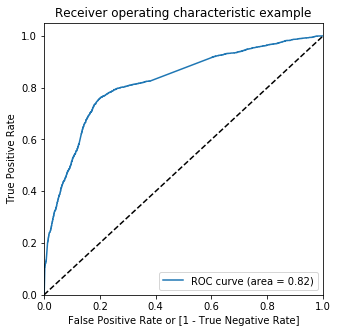

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Finding Optimal Cutoff Point

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.383905,2405,0,1,1,1,1,0,0,0,0,0,0
1,1,0.518010,2311,1,1,1,1,1,1,1,0,0,0,0
2,0,0.191181,3956,0,1,1,0,0,0,0,0,0,0,0
3,0,0.381702,8958,0,1,1,1,1,0,0,0,0,0,0
4,0,0.172142,233,0,1,1,0,0,0,0,0,0,0,0


In [120]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375309  1.000000  0.000000
0.1   0.1  0.407553  0.993034  0.055801
0.2   0.2  0.710821  0.820046  0.645199
0.3   0.3  0.782280  0.763545  0.793536
0.4   0.4  0.785040  0.701238  0.835387
0.5   0.5  0.774001  0.618808  0.867240
0.6   0.6  0.751198  0.490712  0.907696
0.7   0.7  0.734641  0.382740  0.946059
0.8   0.8  0.708061  0.266254  0.973495
0.9   0.9  0.669717  0.131192  0.993257


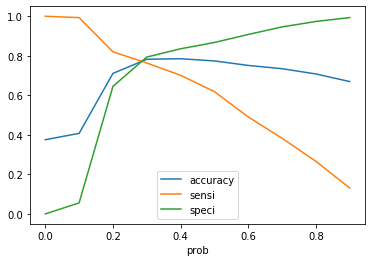

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.23 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.383905,2405,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.518010,2311,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.191181,3956,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.381702,8958,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.172142,233,0,1,1,0,0,0,0,0,0,0,0,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7487291212781408

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3081, 1220],
       [ 510, 2074]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
print("Sensitivity is ", TP / float(TP+FN))
print("Specificity is ", TN / float(TN+FP))
print("False postive rate is ", FP/ float(TN+FP))
print("Positive predictive value ", TP / float(TP+FP))
print("Negative predictive value ", TN / float(TN+ FN))

Sensitivity is  0.8026315789473685
Specificity is  0.7163450360381307
False postive rate is  0.28365496396186934
Positive predictive value  0.6296296296296297
Negative predictive value  0.8579782790309106


## Precision and Recall

In [127]:
# For Precision
print("Precision is ", confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))

Precision is  0.6296296296296297


In [128]:
# For Recall
print("Recall is ", confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

Recall is  0.8026315789473685


In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7368663594470046

In [131]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6188080495356038

### Precision and recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6880    0
 6881    0
 6882    1
 6883    0
 6884    0
 Name: Converted, Length: 6885, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6880    0
 6881    0
 6882    1
 6883    0
 6884    0
 Name: predicted, Length: 6885, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

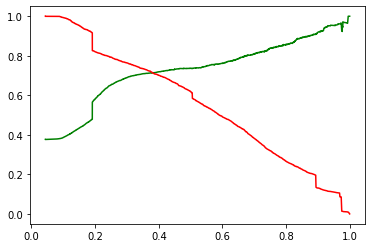

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [136]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,Specialization_Others_Imputed,Interview_Catalog_Yes
390,-0.353895,-0.703270,-0.118040,0,0,0,1,0,0,0,0,0,0,1,0
8918,1.351192,0.058020,2.011192,1,0,0,0,0,0,0,0,0,0,0,1
3580,-0.780167,-0.406496,-0.650348,1,0,0,0,0,0,0,0,0,1,0,1
3867,-1.206439,-0.869169,-1.182656,0,0,0,0,1,0,0,0,0,0,1,0
3815,-0.353895,-0.321703,-0.118040,1,0,0,0,0,1,0,1,0,0,0,1


In [137]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Google,Lead_Source_Olark Chat,Specialization_Others_Imputed
390,-0.353895,-0.703270,0,0,0,1,0,1
8918,1.351192,0.058020,1,0,0,0,0,0
3580,-0.780167,-0.406496,1,0,0,0,0,0
3867,-1.206439,-0.869169,0,0,0,0,1,1
3815,-0.353895,-0.321703,1,0,0,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

390     0.106279
8918    0.294165
3580    0.149543
3867    0.191349
3815    0.171570
6628    0.102001
7731    0.191349
196     0.152146
4767    0.191349
4597    0.213457
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [142]:
# Let's see the head
y_pred_1.head()

,0
390,0.106279
8918,0.294165
3580,0.149543
3867,0.191349
3815,0.171570


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,390,0.106279
1,0,8918,0.294165
2,0,3580,0.149543
3,0,3867,0.191349
4,0,3815,0.171570


In [148]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [149]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,390,0,0.106279
1,8918,0,0.294165
2,3580,0,0.149543
3,3867,0,0.191349
4,3815,0,0.171570


In [151]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.23 else 0)

In [152]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted
0,390,0,0.106279,0
1,8918,0,0.294165,1
2,3580,0,0.149543,0
3,3867,0,0.191349,0
4,3815,0,0.171570,0


In [153]:
# Adding Score column 
y_pred_final["Score"]=y_pred_final["Conversion_Prob"]*100

In [154]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted,Score
0,390,0,0.106279,0,10.627922
1,8918,0,0.294165,1,29.416469
2,3580,0,0.149543,0,14.954348
3,3867,0,0.191349,0,19.134922
4,3815,0,0.171570,0,17.157007


In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7439024390243902

In [156]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[777, 316],
       [125, 504]], dtype=int64)

In [157]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [158]:
print("Sensitivity is ", TP / float(TP+FN))
print("Specificity is ", TN / float(TN+FP))
print("False postive rate is ", FP/ float(TN+FP))
print("Positive predictive value ", TP / float(TP+FP))
print("Negative predictive value ", TN / float(TN+ FN))

Sensitivity is  0.8012718600953895
Specificity is  0.7108874656907593
False postive rate is  0.2891125343092406
Positive predictive value  0.6146341463414634
Negative predictive value  0.8614190687361419
